In [78]:


import better 

import numpy as np
from solver_for_yagi_uda import directional_pattern

#* Define constants
light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12
frequency = 1e6 * 150
omega = 2 * np.pi * frequency
incident_voltage = 20

#! Spatial resolution
delta_z = light_speed / frequency / 2e2

l = light_speed / frequency

#* set geometry of antenna
element_position = np.array([[0.0, 0.0, 0.0], [0.0, 0.15*l, 0.0], [0.0, 0.3*l, 0.0], [0.0, 0.45*l, 0.0]], dtype=float)
element_length = np.array([l*0.51, l*0.45, 0.4*l, l*0.35])
wire_radius = np.array([0.005*l, 0.005*l, 0.005*l, 0.005*l])
source_position = np.array([element_position[1]], dtype = float)

R, R_block, element_num, incident_field, impedance, current, current_block, E_total, phi = directional_pattern (frequency, delta_z, incident_voltage, element_position, element_length, wire_radius, source_position)

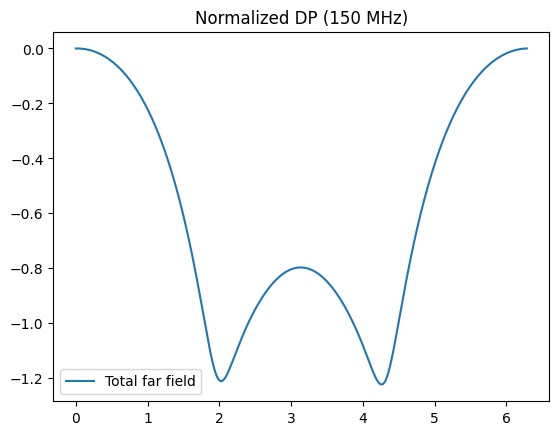

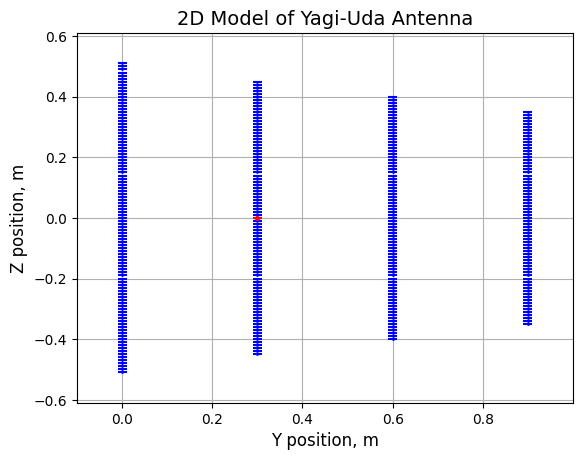

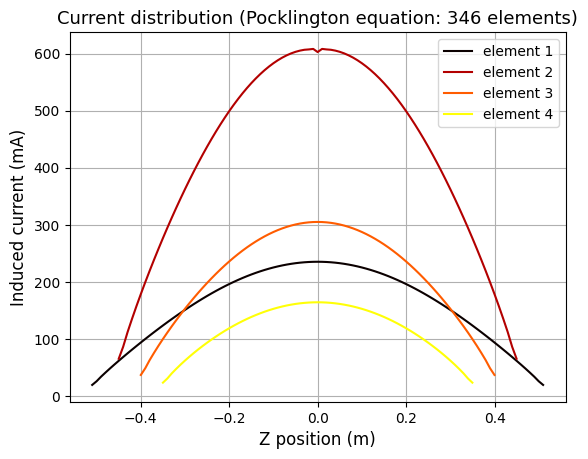

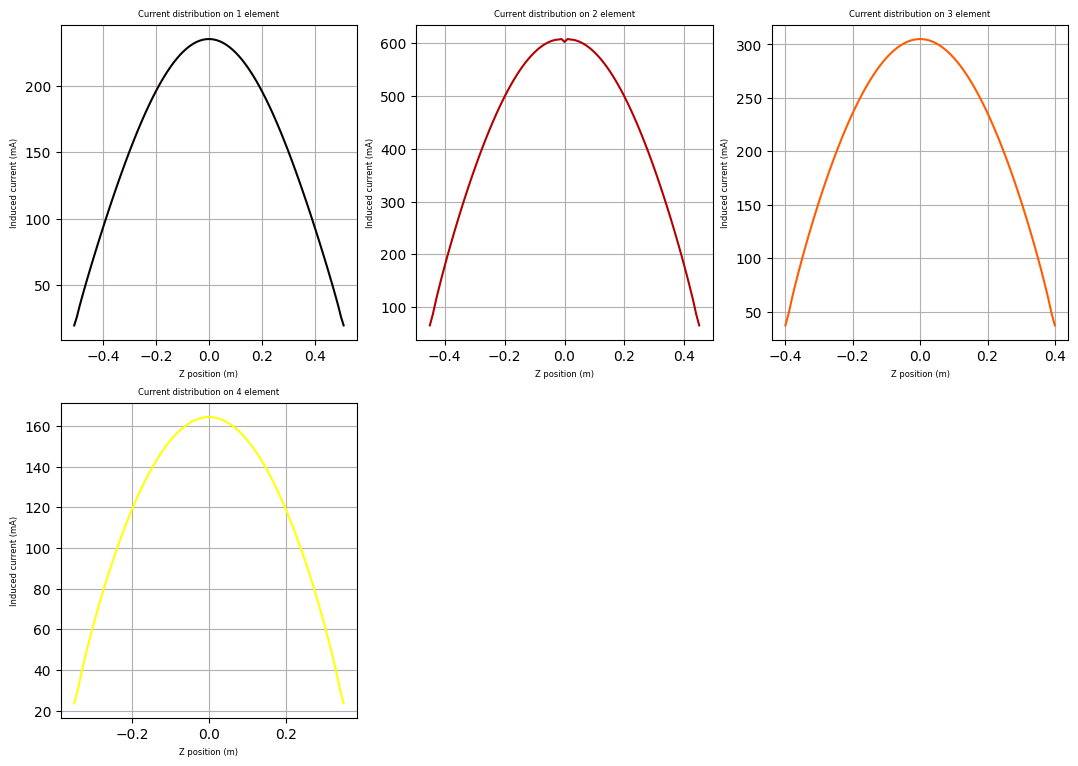

In [79]:
from yagi_visualization import plot_2dmodel, plot_together, plot_separately, current_distribution_2d, current_distribution_3d
import matplotlib.pyplot as plt

plt.plot(phi, np.log10(E_total/np.max(E_total)), label = "Total far field")
plt.title("Normalized DP (150 MHz)")
plt.legend()
plot_2dmodel(R, source_position, sum(element_num), delta_z)
plot_together(R_block, current_block)
plot_separately(R_block, current_block)
current_distribution_2d(R, current)
current_distribution_3d(R, source_position, R_block, current_block)